In [188]:
from skimage.io import imread, imsave
import os
import numpy as np
import matplotlib.pyplot as plt

In [180]:
from matplotlib import cm

In [2]:
num_classes = 21

mode = 'train'

DEFUALT_PATHS = {
    'images': '/mnt/disk/chenyifeng/VOC2012/tf_records/images',
    'annotations': '/mnt/disk/chenyifeng/VOC2012/tf_records/annotations',
    'segmentations': '/mnt/disk/chenyifeng/VOC2012/tf_records/segmentations'
}

pic_names = open('/mnt/disk/chenyifeng/VOC2012/tf_records/pascal_voc_{}.txt'.format(mode)).readlines()
pic_names = [i.rstrip('\n') for i in pic_names]

for key in DEFUALT_PATHS.keys():
    DEFUALT_PATHS[key] = os.path.join(DEFUALT_PATHS[key], mode)

# show segmentation label

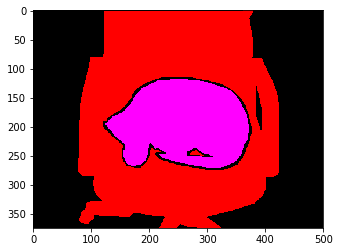

In [189]:
# for idx, name in enumerate(pic_names):
name= pic_names[2]
segmentation = imread(os.path.join(DEFUALT_PATHS['segmentations'], name+'.png'))
image = imread(os.path.join(DEFUALT_PATHS['images'], name+'.jpg'))

from datasets.pascal_voc_utils import pascal_voc_palette

one_hot = np.zeros([*segmentation.shape + (21,)])

for i in range(one_hot.shape[0]):
    for j in range(one_hot.shape[1]):
        one_hot[i, j ,segmentation[i, j]] = 1

one_hot = one_hot.dot(pascal_voc_palette)

plt.imshow(one_hot)

# locate boundary

In [182]:
def naive_boundary(segmentation):
    vet_pad = np.pad(segmentation,[[1,0],[0,0]], mode='reflect')
    vet_bnd = np.zeros(segmentation.shape)

    for i in range(segmentation.shape[0]):
        vet_bnd[i, :] = (np.not_equal(vet_pad[i+1, :], vet_pad[i, :]))

    hor_pad = np.pad(segmentation,[[0,0],[1,0]], mode='reflect')
    hor_bnd = np.zeros(segmentation.shape)

    for i in range(segmentation.shape[1]):
        hor_bnd[:, i] = (np.not_equal(hor_pad[:, i+1], hor_pad[:, i]))

    bnd = hor_bnd + vet_bnd
    bnd[bnd > 0] = 1
    bnd[bnd < 0] = 0
    
    for row in range(bnd.shape[0]):
        for col in range(bnd.shape[1]):
            if bnd[row][col] ==1:
                for tryx in range(max(0, row-1), min(row+2, bnd.shape[0])):
                    for tryy in range(max(0, col-1), min(col+2, bnd.shape[1])):
                        bnd[tryx][tryy] = 2
    bnd[bnd > 0] = 255

    return bnd

In [199]:
out_dir = '/mnt/disk/chenyifeng/VOC2012/tf_records/boundaries'
for name in pic_names:
    segmentation = imread(os.path.join(DEFUALT_PATHS['segmentations'], name+'.png'))
    image = imread(os.path.join(DEFUALT_PATHS['images'], name+'.jpg'))
    bnd = naive_boundary(segmentation)
    plt.imsave(os.path.join(out_dir, name+'.png'), np.uint8(bnd), cmap = cm.gray)